In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

plot_dir = "plots"
os.makedirs(plot_dir, exist_ok=True)


In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
def plot_bar(class_name_list, noise_asr, patch_asr, figsize=(7,7), xlabel="Classes", ylabel="Attack Success Rate (ASR) %", bwidth=0.3, legend_loc="best", save_path=None):
    noise_asr = np.asarray(noise_asr)
    patch_asr = np.asarray(patch_asr)
    assert len(class_name_list) == len(noise_asr) == len(patch_asr)
    n_class = len(class_name_list)
    ind = np.arange(n_class)
    
    plt.figure(figsize=figsize)
    width = bwidth
    fontsize = 25
    plt.bar(ind, noise_asr*100, width, color="green", label='Random Patch')
    plt.bar(ind + width, patch_asr*100, width, color="red", hatch="//", label='Adversarial Patch')

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    # plt.title('No title')

    # 1st argument - A list of positions at which ticks should be placed
    # 2nd argument -  A list of labels to place at the given locations
    plt.xticks(ind + width / 2, class_name_list, fontsize=fontsize-1)
    plt.yticks(fontsize=fontsize-1)

    # Finding the best position for legends and putting it
    plt.legend(loc=legend_loc, bbox_to_anchor=(.4, 1., .2, .102), ncol=3, fontsize=fontsize - 5, frameon=False)
    if save_path is not None:
        plt.savefig(save_path + ".pdf")
        plt.savefig(save_path + ".png")
    plt.show()

In [4]:
def plot_line_graph(sizes, noise_asr, patch_asr, legend_loc="best", save_path=None):
    noise_asr = np.asarray(noise_asr)
    patch_asr = np.asarray(patch_asr)
    plt.figure(figsize=(8,8))
    fontsize = 25
    plt.plot(sizes, patch_asr * 100, marker='x', color="red", ls="dotted", label='Adversarial Patch', linewidth=4.0, markersize=10)
    plt.plot(sizes, noise_asr * 100, marker='o', color="green", ls="dashed", label='Random Patch', linewidth=4.0, markersize=10)

    plt.xlabel('Patch Proportion', fontsize=fontsize)
    plt.ylabel('Attack Success Rate (ASR) %', fontsize=fontsize)
    # plt.title('No title')
    plt.xticks(sizes, fontsize=fontsize-1)
    plt.yticks(fontsize=fontsize-1)

    # Finding the best position for legends and putting it
    # plt.legend(loc=legend_loc, fontsize=fontsize - 5)
    plt.legend(loc=legend_loc, bbox_to_anchor=(.4, 1, .2, .102), ncol=3, fontsize=fontsize - 4, frameon=False)
    
    if save_path is not None:
        plt.savefig(save_path + ".pdf", bbox_inches='tight')
        plt.savefig(save_path + ".png", bbox_inches='tight')
    plt.show()

## plots Attack Success Rates (Bar charts)


### All Classes

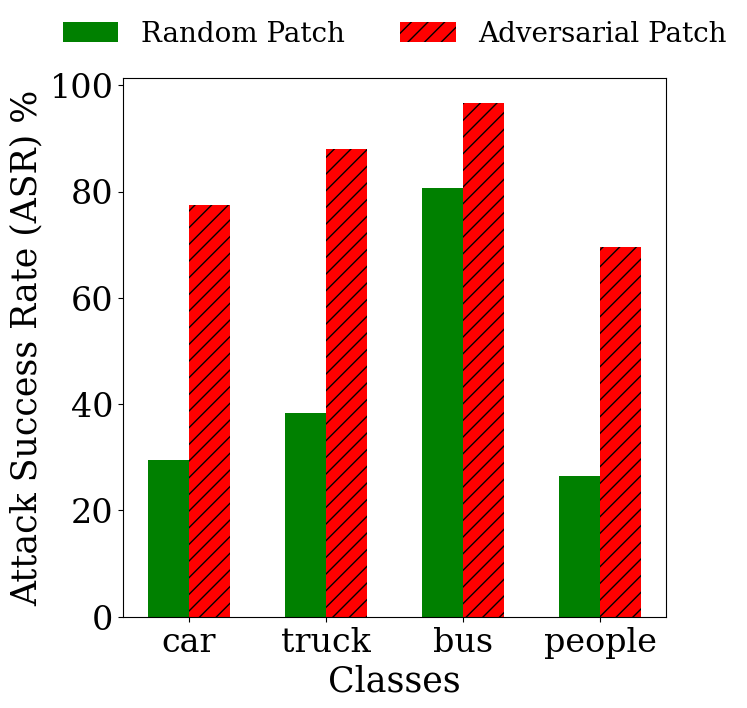

In [142]:
# we use gt400 trained patches 
# for s_coco trained for all classes for proportion 0.3
classes = ["car", "truck", "bus", "people"]
noise_asr = np.array([0.295,0.383,0.807,0.265])
patch_asr = np.array([0.774,0.881,0.966,0.695])
plot_bar(classes, noise_asr, patch_asr, legend_loc="upper center")


### Car

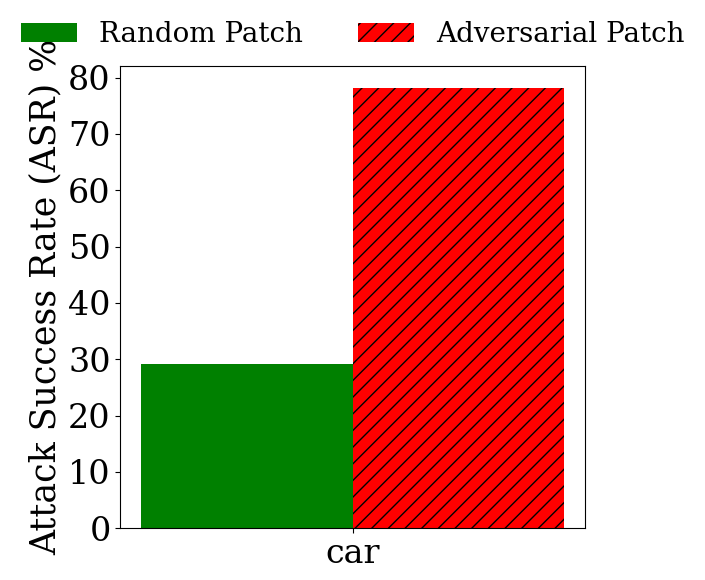

In [143]:
# we use all trained patches
# for s_coco trained for only car for proportion 0.3
classes = ["car"]
noise_asr = [0.291]
patch_asr = [0.781]
plot_bar(classes, noise_asr, patch_asr, xlabel="", bwidth=0.1, figsize=(6,6), legend_loc="upper center")

## plots ASR against patch proportion size only for cars (line curves)

### YOLOv5 coco small

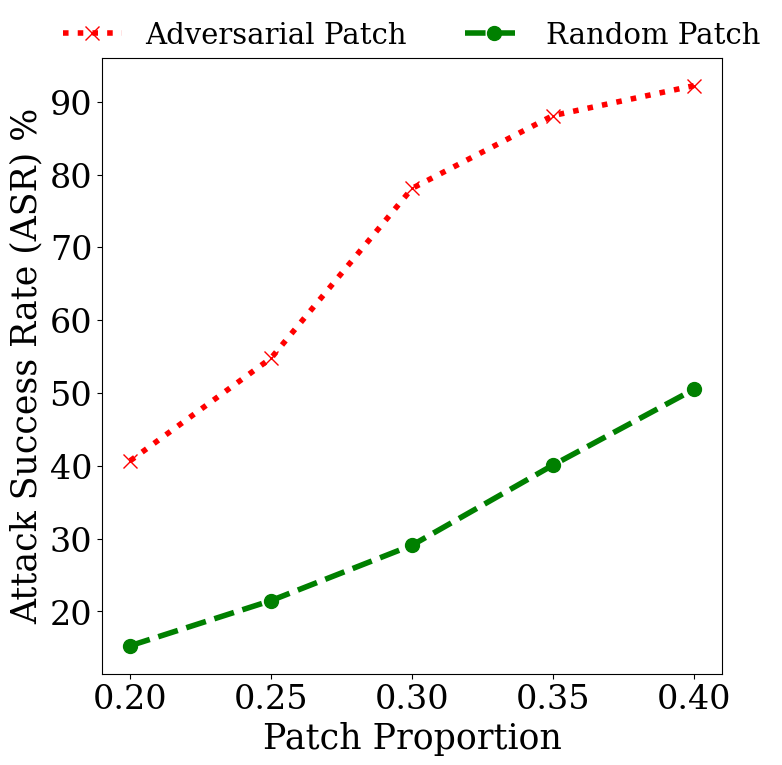

In [160]:
props = [0.2, 0.25, 0.3, 0.35, 0.4]
noise_asr = [0.153, 0.215, 0.291, 0.401, 0.505]
patch_asr = [0.407, 0.548, 0.781, 0.881, 0.922]
plot_line_graph(props, noise_asr, patch_asr, legend_loc="upper center", save_path=f"{plot_dir}/s_coco_car_prop_vs_asr")


### YOLOv5 coco large

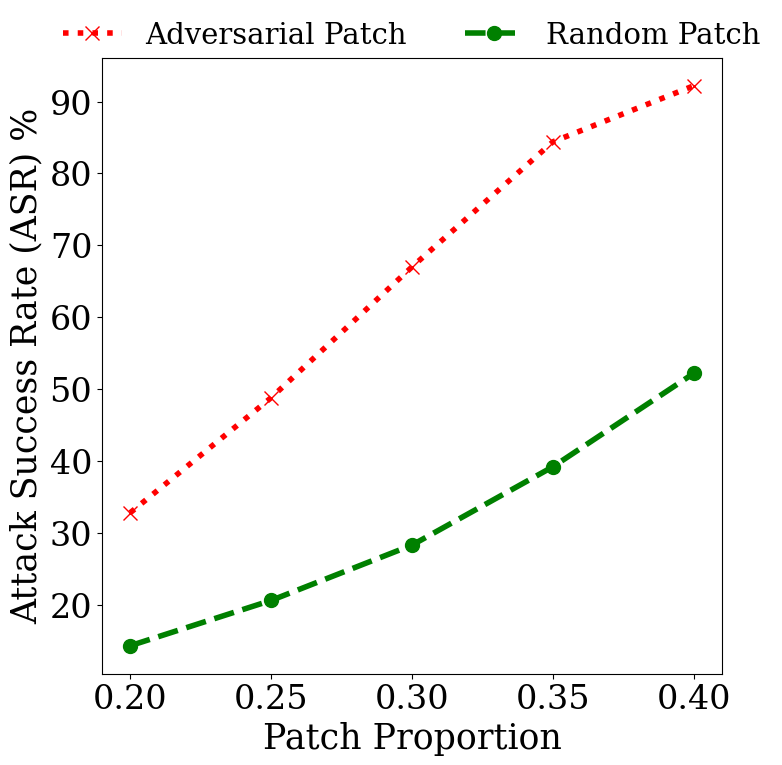

In [5]:
props = [0.2, 0.25, 0.3, 0.35, 0.4]
noise_asr = [0.143, 0.206, 0.283, 0.392, 0.522]
patch_asr = [0.328, 0.488, 0.670, 0.844, 0.922]
plot_line_graph(props, noise_asr, patch_asr, legend_loc="upper center", save_path=f"{plot_dir}/l_coco_car_prop_vs_asr")


## Gray Box only for cars (Bar Charts)

### Patch trained on s_coco proportion 0.3 tested on s_coco, s_scratch, l_coco, l_scratch

In [154]:
# White Box baseline
## trained on s_coco tested on s_coco
s_coco_to_s_coco_noise_asr = 0.291
s_coco_to_s_coco_patch_asr = 0.781

# Gray Box
## trained on s_coco tested on s_scratch
s_coco_to_s_scratch_noise_asr = 0.281
s_coco_to_s_scratch_patch_asr = 0.757

## trained on s_coco tested on l_coco
s_coco_to_l_coco_noise_asr = 0.286
s_coco_to_l_coco_patch_asr = 0.690

## trained on s_coco tested on l_scratch
s_coco_to_l_scratch_noise_asr = 0.272
s_coco_to_l_scratch_patch_asr = 0.790

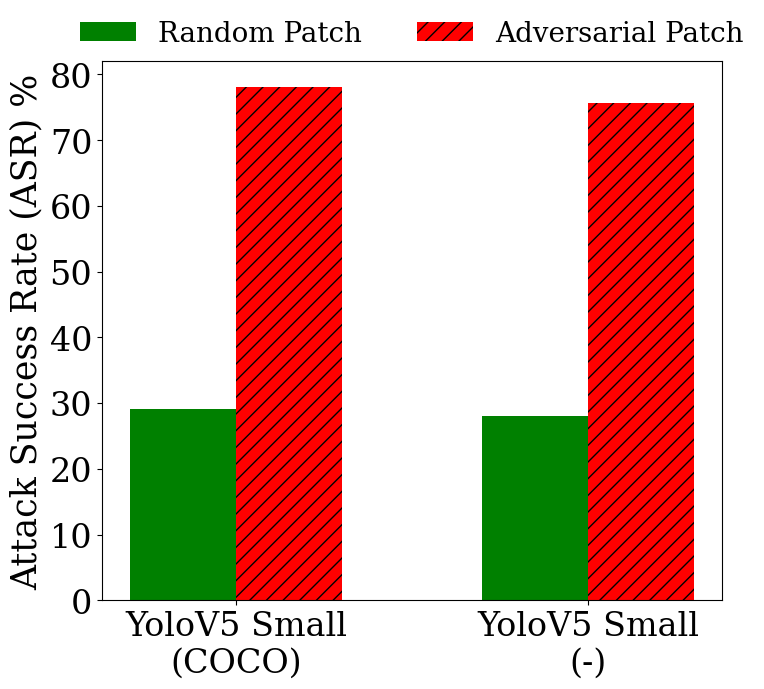

In [155]:
x_labels = ["YoloV5 Small\n(COCO)", "YoloV5 Small\n(-)"]
noise_asr = np.array([s_coco_to_s_coco_noise_asr, s_coco_to_s_scratch_noise_asr])
patch_asr = np.array([s_coco_to_s_coco_patch_asr, s_coco_to_s_scratch_patch_asr])
plot_bar(x_labels, noise_asr, patch_asr, figsize=(8,7), xlabel="", legend_loc="center", save_path=f"{plot_dir}/asr_s_coco_2_s_coco_s_scratch")

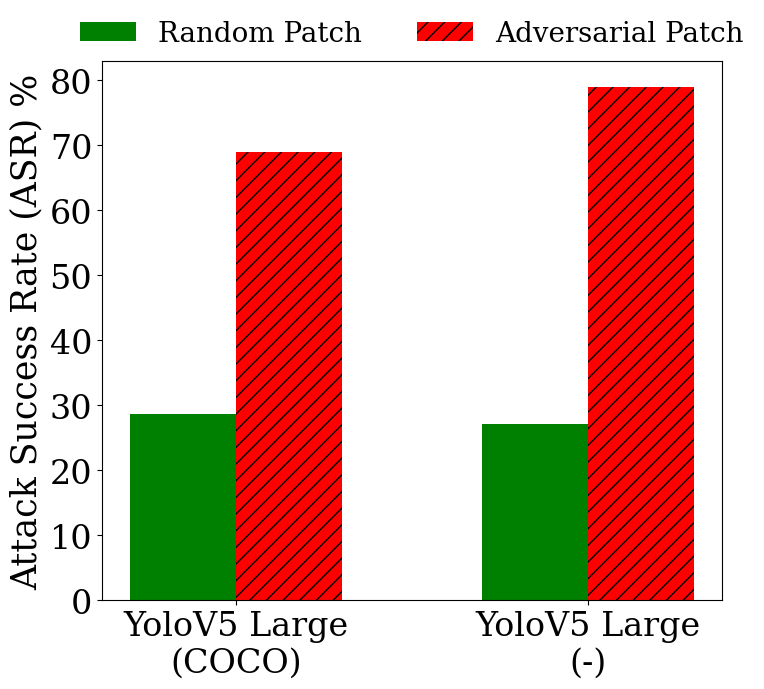

In [156]:
x_labels = ["YoloV5 Large\n(COCO)", "YoloV5 Large\n(-)"]
noise_asr = np.array([s_coco_to_l_coco_noise_asr, s_coco_to_l_scratch_noise_asr])
patch_asr = np.array([s_coco_to_l_coco_patch_asr, s_coco_to_l_scratch_patch_asr])
plot_bar(x_labels, noise_asr, patch_asr, figsize=(8,7), xlabel="", legend_loc="center", save_path=f"{plot_dir}/asr_s_coco_2_l_coco_l_scratch")

## Additional Gray Box Tests

### Patch trained on s_coco proportion 0.3

In [105]:
# White Box baseline
## trained on s_scratch tested on s_scratch
s_scratch_to_s_scratch_noise_asr = 0.281
s_scratch_to_s_scratch_patch_asr = 0.773
## trained on l_coco tested on l_coco
l_coco_to_l_coco_noise_asr = 0.283
l_coco_to_l_coco_patch_asr = 0.670

# Gray Box
## trained on s_coco tested on s_scratch
s_coco_to_s_scratch_noise_asr = 0.281
s_coco_to_s_scratch_patch_asr = 0.757
## trained on s_coco tested on l_coco
s_coco_to_l_coco_noise_asr = 0.286
s_coco_to_l_coco_patch_asr = 0.690

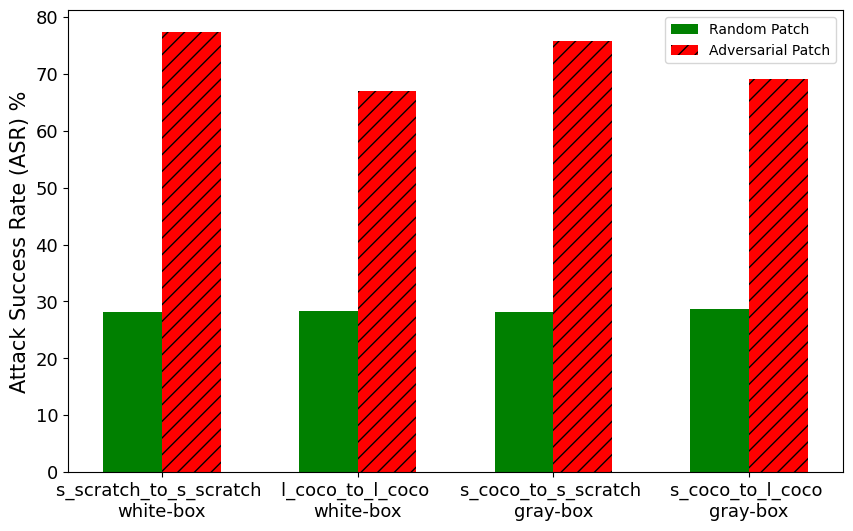

In [106]:
x_labels = ["s_scratch_to_s_scratch \nwhite-box", "l_coco_to_l_coco \nwhite-box", "s_coco_to_s_scratch \ngray-box", "s_coco_to_l_coco \ngray-box"]
noise_asr = np.array([s_scratch_to_s_scratch_noise_asr, l_coco_to_l_coco_noise_asr, s_coco_to_s_scratch_noise_asr, s_coco_to_l_coco_noise_asr])
patch_asr = np.array([s_scratch_to_s_scratch_patch_asr, l_coco_to_l_coco_patch_asr, s_coco_to_s_scratch_patch_asr, s_coco_to_l_coco_patch_asr])
plot_bar(x_labels, noise_asr, patch_asr, figsize=(10,6), xlabel="")

### Patch trained on l_coco  proportion 0.3

In [100]:
# White Box baseline
## trained on l_scratch tested on l_scratch
l_scratch_to_l_scratch_noise_asr = 0.269
l_scratch_to_l_scratch_patch_asr = 0.805
## trained on s_coco tested on s_coco
s_coco_to_s_coco_noise_asr = 0.291
s_coco_to_s_coco_patch_asr = 0.781

# Gray Box
## trained on l_coco tested on l_scratch
l_coco_to_l_scratch_noise_asr = 0.271
l_coco_to_l_scratch_patch_asr = 0.664
## trained on l_coco tested on s_coco
l_coco_to_s_coco_noise_asr = 0.294
l_coco_to_s_coco_patch_asr = 0.672

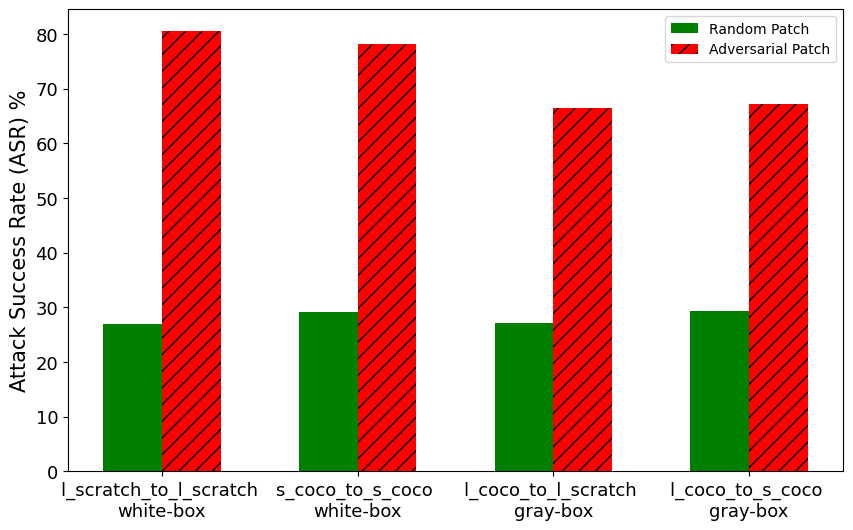

In [101]:
x_labels =          ["l_scratch_to_l_scratch \nwhite-box", "s_coco_to_s_coco \nwhite-box", "l_coco_to_l_scratch \ngray-box", "l_coco_to_s_coco \ngray-box"]
noise_asr = np.array([l_scratch_to_l_scratch_noise_asr, s_coco_to_s_coco_noise_asr, l_coco_to_l_scratch_noise_asr, l_coco_to_s_coco_noise_asr ])
patch_asr = np.array([l_scratch_to_l_scratch_patch_asr, s_coco_to_s_coco_patch_asr, l_coco_to_l_scratch_patch_asr, l_coco_to_s_coco_patch_asr ])
plot_bar(x_labels, noise_asr, patch_asr, figsize=(10,6), xlabel="")

## plots the map curve for no patch, random patch and adversarial patch

No Patch 0.661 mAP@0.5
Adversarial Patch 0.105 mAP@0.5
Random Patch 0.404 mAP@0.5


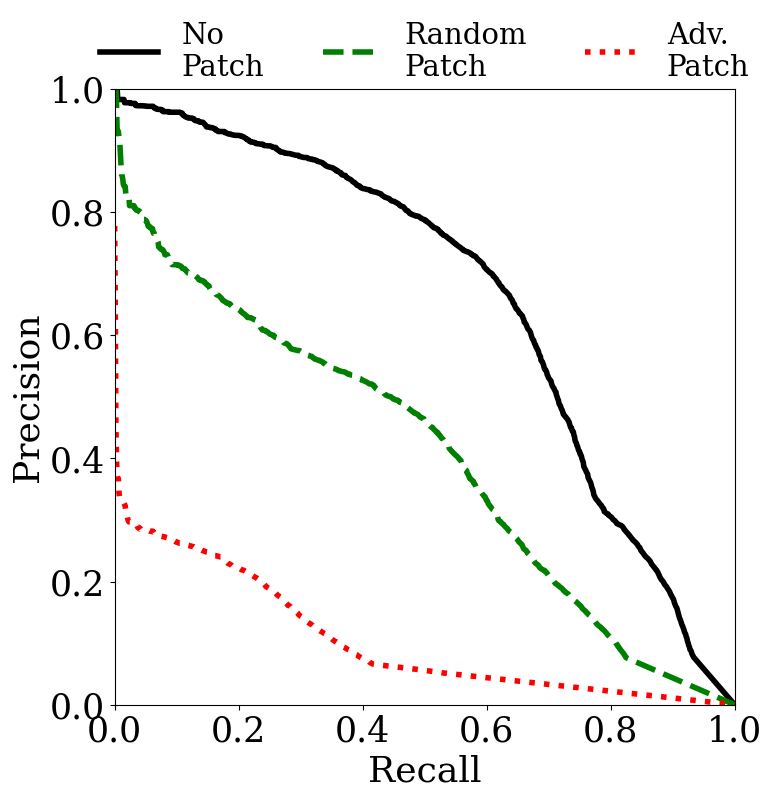

In [6]:
npy_path1 = "runs/val_for_map/s_coco_clean_all_gt400/PR_curve.npy"
npy_path2 = "runs/val_for_map/s_coco_patch_all_gt400/PR_curve.npy"
npy_path3 = "runs/val_for_map/s_coco_random_all_gt400/PR_curve.npy"
save_path = f"{plot_dir}/map_all_classes_gt400_PR_curve"

# npy_path1 = "runs/val_for_map/s_coco_clean_car_gt400/PR_curve.npy"
# npy_path2 = "runs/val_for_map/s_coco_patch_car_gt400/PR_curve.npy"
# npy_path3 = "runs/val_for_map/s_coco_random_car_gt400/PR_curve.npy"
# save_path = f"{plot_dir}/map_car_gt400_PR_curve"

px1, py1, ap1 = np.load(npy_path1, allow_pickle=True)
px2, py2, ap2 = np.load(npy_path2, allow_pickle=True)
px3, py3, ap3 = np.load(npy_path3, allow_pickle=True)
py1 = np.stack(py1, axis=1)
py2 = np.stack(py2, axis=1)
py3 = np.stack(py3, axis=1)
print('No Patch %.3f mAP@0.5' % ap1[:, 0].mean())
print('Adversarial Patch %.3f mAP@0.5' % ap2[:, 0].mean())
print('Random Patch %.3f mAP@0.5' % ap3[:, 0].mean())

linewidth = 4
fig = plt.figure(figsize=(8, 8))
# plot 1 3 2 or no_patch, random_patch, adversarial_patch
plt.plot(px1, py1.mean(1), linewidth=linewidth, color='black', label='No\nPatch')
plt.plot(px3, py3.mean(1), linewidth=linewidth, color='green', label='Random\nPatch', ls="dashed")
plt.plot(px2, py2.mean(1), linewidth=linewidth, color='red', label='Adv.\nPatch', ls="dotted")

fontsize = 26
plt.xlabel('Recall', fontsize=fontsize)
plt.ylabel('Precision', fontsize=fontsize)
plt.xticks(fontsize=fontsize-1)
plt.yticks(fontsize=fontsize-1)
plt.xlim(0, 1)
plt.ylim(0, 1)


# plt.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=fontsize-7)
plt.legend(loc="upper center", bbox_to_anchor=(.4, 1.05, .2, .102), ncol=3, fontsize=fontsize - 5, frameon=False)
# plt.title('Precision-Recall Curve')
plt.grid(False)
# plt.plot([0, 1], [0, 1], ls='--', alpha=0.5, color="grey") # dashed line


plt.savefig(save_path + ".pdf", bbox_inches='tight')
plt.savefig(save_path + ".png", bbox_inches='tight')
